# Setup

In [8]:
import sys
sys.path.append('../../')

import CCfrag

# Creating queries for AlphaFold

In [2]:
INPUT_FASTA = 'MACH.fasta'

In [9]:
for win_len, overlap in [[100,50]]:
	for nmer in [3]:
		divider = CCfrag.Divider(L=win_len, O=overlap, nmer=nmer)
		divider.generate_queries(INPUT_FASTA, 'CCfrag_constructs_MACH', format='single_fasta')

In [4]:
!ls CCfrag_constructs_MACH/MACH/

3_100_50  source_MACH.fasta


In [5]:
!ls CCfrag_constructs_MACH/MACH/3_100_50/

constructs.csv	parameters.json  queries


In [6]:
!ls CCfrag_constructs_MACH/MACH/3_100_50/queries/

MACH_3_0-100.fasta	MACH_3_1550-1650.fasta	MACH_3_400-500.fasta
MACH_3_1000-1100.fasta	MACH_3_1600-1700.fasta	MACH_3_450-550.fasta
MACH_3_100-200.fasta	MACH_3_1650-1750.fasta	MACH_3_500-600.fasta
MACH_3_1050-1150.fasta	MACH_3_1700-1800.fasta	MACH_3_50-150.fasta
MACH_3_1100-1200.fasta	MACH_3_1750-1850.fasta	MACH_3_550-650.fasta
MACH_3_1150-1250.fasta	MACH_3_1800-1900.fasta	MACH_3_600-700.fasta
MACH_3_1200-1300.fasta	MACH_3_1850-1950.fasta	MACH_3_650-750.fasta
MACH_3_1250-1350.fasta	MACH_3_1900-2000.fasta	MACH_3_700-800.fasta
MACH_3_1300-1400.fasta	MACH_3_1950-2050.fasta	MACH_3_750-850.fasta
MACH_3_1350-1450.fasta	MACH_3_1953-2053.fasta	MACH_3_800-900.fasta
MACH_3_1400-1500.fasta	MACH_3_200-300.fasta	MACH_3_850-950.fasta
MACH_3_1450-1550.fasta	MACH_3_250-350.fasta	MACH_3_900-1000.fasta
MACH_3_1500-1600.fasta	MACH_3_300-400.fasta	MACH_3_950-1050.fasta
MACH_3_150-250.fasta	MACH_3_350-450.fasta


# Running AlphaFold

...

In [1]:
!du -h -d 1 | grep AlphaFold

1,5G	./AlphaFold_predictions


## Transforming AlphaFold output to ColabFold format

In [ ]:
cd /ebio/abt1_share/hendecad_CC_models/0_DEIfold/GitHub_repo/DEIfold_alpha/examples/MACH/

In [10]:
from CCfrag.extra import AF2_to_ColabFold_formatter

In [11]:
reformatter = AF2_to_ColabFold_formatter(relpath_AF2_results='AlphaFold_predictions',
                                         relpath_ColabFold_results='ColabFold_predictions')
                                         

In [12]:
reformatter.reformat_results()

# Creating the CCfrag assembly

In [13]:
import matplotlib.pyplot as plt
import numpy as np

## ColabFold

In [14]:
integrator = CCfrag.Integrator(path_fragments='ColabFold_predictions',
                               list_features=['plddt', 'para', 'kih', 'pae', 'heli'],
                               data_output='DATA_CCfrag.csv',
                               dict_feature_flattening={'kih': np.max})

In [16]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of MACH ...
MACH read as a sequence of length 2053
Found 1 specification folders:
* 3_100_50/


In [17]:
df_data_sequence

,residue_name,residue_number,3_100_50_plddt,3_100_50_para,3_100_50_kih,3_100_50_pae,3_100_50_heli
0,M,0,31.500000,0.0,0.0,20.641478,0.0
1,A,1,36.013333,0.0,0.0,20.641478,0.0
2,K,2,37.450000,0.0,0.0,20.641478,0.0
3,N,3,44.690000,0.0,0.0,20.641478,0.0
4,S,4,52.676667,0.0,0.0,20.641478,0.0
...,...,...,...,...,...,...,...
2048,A,2048,90.676667,1.0,1.0,6.936619,0.5
2049,G,2049,86.793333,1.0,0.0,6.936619,0.0
2050,K,2050,84.743333,1.0,0.0,8.605114,0.0
2051,L,2051,82.970000,1.0,0.0,8.605114,0.0


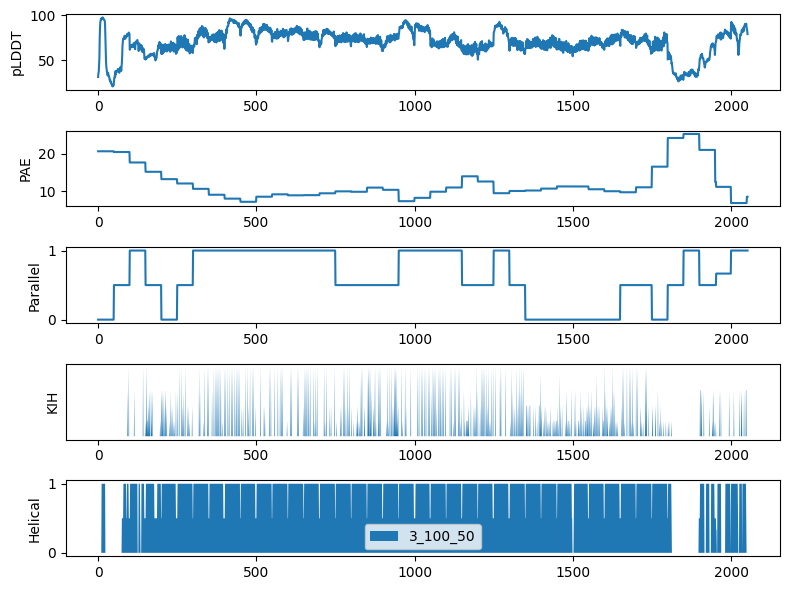

In [19]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=5, ncols=1, figsize=(8,6))

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    # thresholding the data for visualization
    kih_data = np.minimum(kih_data, 1.5)
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    heli_data = df_data_sequence[f'{specification}_heli']
    axarr[4].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+heli_data, label=specification)
        
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])
    axarr[4].set_ylabel('Helical')

plt.legend()
plt.tight_layout()
#plt.vlines(x=580, ymin=0,ymax=100)

# Mask parallel computation for only coiled-coil domains

In [20]:
import numpy as np

def check_nearby(arr, distance=3):
    kernel = np.ones(2 * distance + 1)
    conv_result = np.convolve(arr, kernel, mode='same')
    return conv_result > 0

In [21]:
df_data_sequence[f'{specification}_para'].to_numpy()

array([0., 0., 0., ..., 1., 1., 1.])

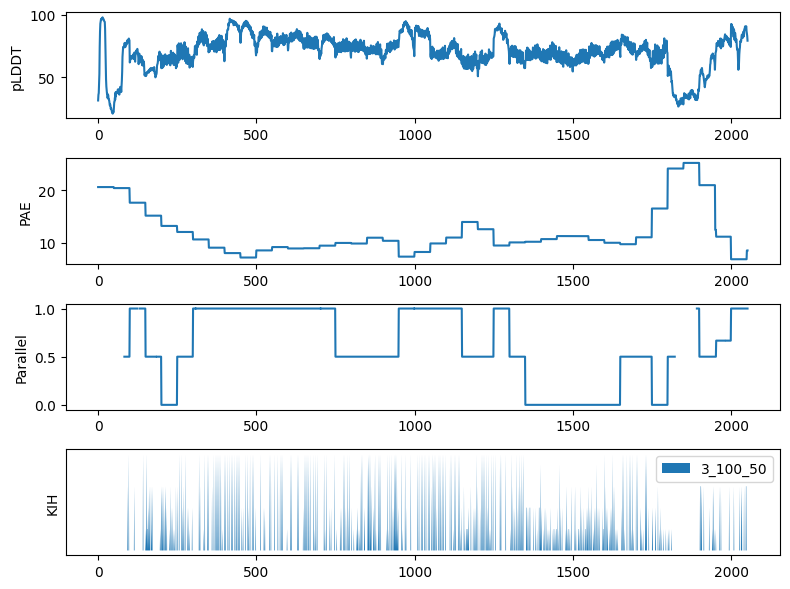

In [22]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6))

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    
    para_data_raw = df_data_sequence[f'{specification}_para'].to_numpy().copy()
    kih_data_raw = df_data_sequence[f'{specification}_kih'].to_numpy().copy()
    kih_data = np.minimum(kih_data_raw, 1.5)
    # thresholding the data for visualization
    #kih_data = np.minimum(kih_data, 1.5)
    kih_data_filter = kih_data_raw > 0.25
    mask_kih_present = check_nearby(kih_data_filter, 10).astype(int)
    para_data_raw[mask_kih_present == 0] = np.nan
    para_data_raw[0] = 0 #this is needed to avoid matplotlib from moving the x axis
    axarr[2].plot(para_data_raw+0.04*i_spec, label=specification)
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
        
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend()
plt.tight_layout()
#plt.vlines(x=580, ymin=0,ymax=100)